In [23]:
# для начала импортируем модули, которые понадобятся нам для написание классификатора 
# numpy - библиотека для работы с массивами(матрицами в том числе), помогает делать различные операции над ними
import numpy as np
# matplotlib, seaborn понадобятся для рисования графиков, отображения изображений
from matplotlib import pyplot as plt
import seaborn as sns

# с помощью этой команды графики будут отображаться в текущем окне в ноутбуке под ячейкой, где написан код для отображения графика 
%matplotlib inline

# Зафиксируем случайность, чтобы каждый раз получалось одно и тоже
np.random.seed(seed=42)

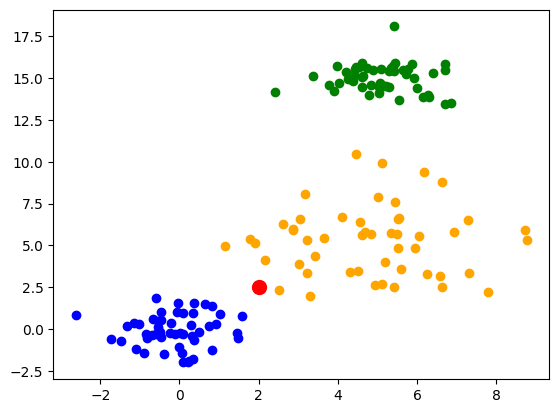

In [24]:
p1 = np.random.normal(loc=0, scale=1, size=(50,2))
p2 = np.random.normal(loc=5, scale=2, size=(50,2))
p3 = np.random.normal(loc=10, scale=0.8, size=(50,2)) - np.array([5, -5])


X = np.concatenate((p1, p2, p3))
y = np.array([1]*50 + [2]*50 + [3]*50)

point = [2, 2.5]

plt.scatter(p1[:,0], p1[:, 1], color='blue')
plt.scatter(p2[:,0], p2[:, 1], color='orange')
plt.scatter(p3[:,0], p3[:, 1], color='green')
plt.scatter(point[0], point[1], s = 100, color='red')

Задание #1

In [25]:
import numpy as np

def euclidian_metric(a, b):
    return np.sqrt(np.sum(np.power(a - b, 2), axis=1))

In [27]:
a = np.zeros((1,4))
b = np.ones((1,4))

assert euclidian_metric(a,b)[0] == 2
print('ошибок нет')

ошибок нет


In [28]:
array = [[1,2,3],[1,2,3],[1,2,3]]
print('Сумма при axis = 0: {0}'.format(np.sum(array, axis = 0)))
print('Сумма при axis = 1: {0}'.format(np.sum(array, axis = 1)))

Сумма при axis = 0: [3 6 9]
Сумма при axis = 1: [6 6 6]


Задание #2.1

In [29]:
import numpy as np

def __find_neighbours(k, y, distances):
    # Получаем индексы, которые сортируют расстояния по возрастанию
    sorted_indices = np.argsort(distances)
    
    # Берем первые k индексов (ближайшие соседи)
    nearest_indices = sorted_indices[:k]
    
    # Получаем классы ближайших соседей
    neighbours_classes = y[nearest_indices]
    
    # Получаем расстояния до ближайших соседей
    neighbours_distances = distances[nearest_indices]
    
    return neighbours_classes, neighbours_distances

In [30]:
Y = np.arange(10)
dist = np.linspace(1, 10, 10)
neighbours = __find_neighbours(3, Y, dist)
real_neighbours = ([0, 1, 2], [1., 2., 3.])
for i in range(len(neighbours)):
    for j in range(len(neighbours[i])):
        assert neighbours[i][j] == real_neighbours[i][j]
print('Если вы видите этот текст, но не видите ошибку, то всё работает корректно!')

Если вы видите этот текст, но не видите ошибку, то всё работает корректно!


#Задание 2.2

In [31]:
import numpy as np

def __get_closest_classes(neighbours):
    # Используем np.unique для получения уникальных классов и их количества
    unique_classes, counts = np.unique(neighbours, return_counts=True)
    
    # Находим максимальное количество вхождений
    max_count = np.max(counts)
    
    # Находим все классы, у которых количество вхождений равно максимальному
    best_classes = unique_classes[counts == max_count]
    
    return best_classes.tolist()

In [32]:
# sanity check
assert __get_closest_classes(np.asarray([1,2,3,2,2])) == [2]
closest = __get_closest_classes(np.asarray([1,2,3,2,3]))
assert closest[0] == 2 and closest[1] == 3
print('get_closest_classes работает верно')

get_closest_classes работает верно


#Задание 2.3

In [33]:
import numpy as np

def _choose_best_class(best_classes, neighbours, neighbouring_distances):
    min_mean_dist = np.inf
    best_class = None

    for cls in best_classes:
        # Находим индексы объектов, принадлежащих текущему классу
        indices = np.where(neighbours == cls)[0]
        
        # Вычисляем среднее расстояние до объектов этого класса
        mean_dist = np.mean(neighbouring_distances[indices])
        
        # Если среднее расстояние меньше текущего минимального, обновляем лучший класс
        if mean_dist < min_mean_dist:
            min_mean_dist = mean_dist
            best_class = cls

    return best_class

In [34]:
# sanity check
assert _choose_best_class([1,2], np.array([1, 2, 1, 3, 2]), np.array([0.5, 1, 1, 8, 0.6])) == 1
print('Проверка пройдена')

Проверка пройдена


In [35]:
def nearest_neighbours_classify(x, y, k, x_pred):
    res = np.zeros(x_pred.shape[0], dtype=y.dtype)

    for i in range(x_pred.shape[0]):
        distances = euclidian_metric(x, x_pred[i])  # считаем расстояния до классов
        neighbours, neighbouring_distances = __find_neighbours(k, y, distances)  # находим k ближайших соседей
        best_classes = __get_closest_classes(neighbours)  # находим преобладающие классы
        res[i] = _choose_best_class(best_classes, neighbours, neighbouring_distances)  # выбираем наиболее подходящий класс

    return res

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_test_split разбивает X и y на выборки при этом размер тестовой выборки устанавливается через test_size  
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# выберем число соседей =  5
# для данных из тестовой выборки предскажем, к какому классу относятся точки
y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

#а теперь сравним предсказанное значение с реальным и выведем значение, показывающее процент верно классифицированных
#(значение будет от 0 до 1 - от 0 до 100 процентов соответственно)
print(accuracy_score(y_test, y_pred))
     

In [19]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загружаем данные MNIST
X, y = datasets.load_digits(return_X_y=True)

# Выводим информацию о данных
print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], int(np.sqrt(X.shape[1])), int(np.sqrt(X.shape[1]))))

Экземпляров: 1797
Размер изображения: 8x8


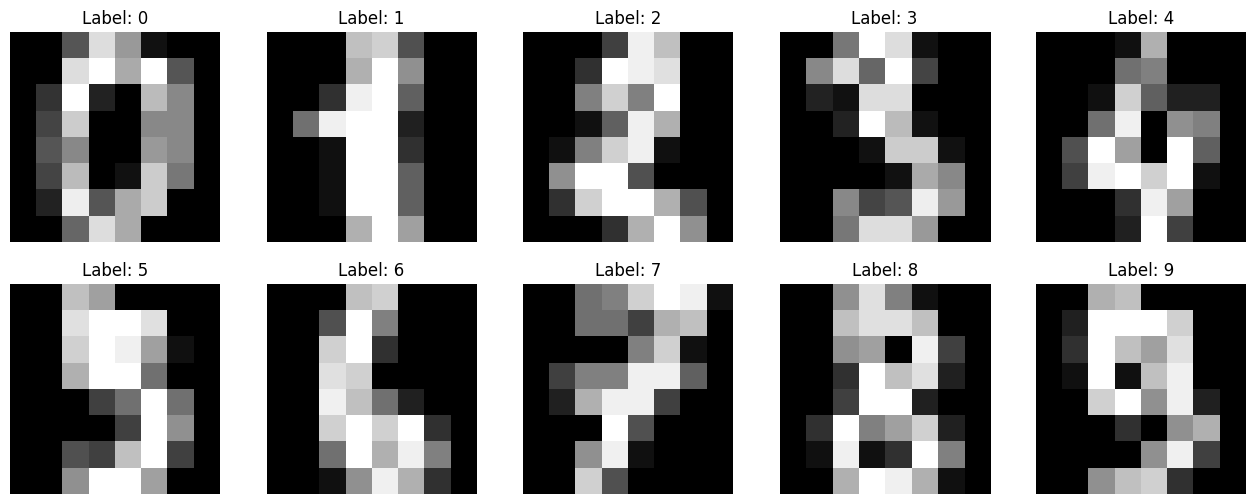

In [20]:
# Визуализируем первые 10 изображений
plt.figure(figsize=(16, 6))
width = int(np.sqrt(X.shape[1]))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i, :].reshape([width, width]), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')

plt.show()

In [21]:
# Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Используем функцию nearest_neighbours_classify для предсказания
y_pred = nearest_neighbours_classify(X_train, y_train, 5, X_test)

# Оцениваем точность классификации
print("Точность классификации:", accuracy_score(y_test, y_pred))

Точность классификации: 0.9861111111111112
